# AM2061 Algorithm 6-2
## Differential Equations - Runge-Kutta 4

The Runge-Kutta Methods are a set of Algorithms used to approximate Differential Equations over time. We had mentioned in Algorithm 6.1 the Euler Method, a type of Runge-Kutta Method. We now discuss Runge-Kutta 4, one of the most commonly used methods to solve Differential Equations. As in **Lecture 21**, by following the general scheme of finding Runge-Kutta methods - derived from Taylor Expansions - we can find the following, with some similarities as before:

$$ w_0 = \alpha $$

$$ w_{i+1} = w_{i} + \frac{h}{6} \left( k_1 + 2 k_2 + 2 k_3 + k_4 \right) $$

Where we have:

$$ k_1 = f \left( t_i, w_i \right) $$

$$ k_2 = f \left( t_i + \frac{h}{2}, w_i + \frac{h}{2} k_1 \right) $$

$$ k_3 = f \left( t_i + \frac{h}{2}, w_i + \frac{h}{2} k_2 \right) $$

$$ k_4 = f \left( t_i + h, w_i + h k_3 \right) $$

We implement a similar method as in Algorithm 6.1.

A brief explanation is as follows:

* We are given the endpoints $a$ and $b$, the initial condition $\alpha$ and the number of steps $N$
* Find $h$, initialise $t$ and $w$
* Perform the above equations over all steps, updating $t$ at the same time

The following is the pseudocode provided:
    
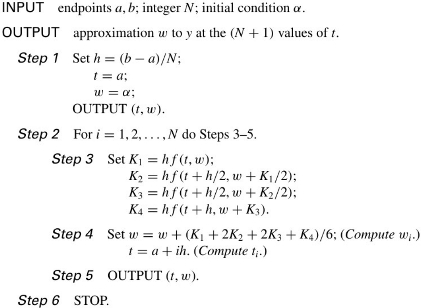

Let us now create this in Python.

First we must define a dataset to work with. I will use what was given in the Example in **Lecture 19** - for comparison with Algorithm 6.1, where we have the following Differential Equation:

$$ \dot{y}= y - t^2 + 1 $$

With $t \in[0, 2]$ and $y(0) = 0.5$, let us choose $h = 0.05$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.05 # use this to set N

a = 0
b = 2
N = int((b - a) / h) # N must be an Integer
alpha = 0.5

f = lambda t, y: y - t**2 + 1 # lambda function of two variables

Now let us define the algorithm, we need to pass in the endpoints, initial condition, and number of steps.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def RungeKutta4(f, a, b, N, alpha):
    '''
    Usage:
        Approximates the solution to Differential Equations in a given range
    Inputs:
        f: Function used
        a: start-point
        b: end-point
        N: Number of Steps
        alpha: Initial Condition
    Outputs:
        t: array of time-values
        w: array of solutions at time-values
    '''
    # Initialise t and w arrays, +1 as we are not counting initial point as a step
    t = np.zeros([N + 1])
    w = np.zeros([N + 1])
    
    # Step 1
    h = (b - a) / N
    t[0] = a
    w[0] = alpha
    
    print("t    | w")
    print("{0:.2f} | {1:.4f}".format(t[0], w[0]))
    
    # Step 2
    for i in range(1, N + 1): # +1 to account for extra index
        # Step 3
        k1 = f(t[i - 1], w[i - 1]) # -1 as we are looking at current guess, or previous value
        k2 = f(t[i - 1] + h / 2, w[i - 1] + h * k1 / 2)
        k3 = f(t[i - 1] + h / 2, w[i - 1] + h * k2 / 2)
        k4 = f(t[i - 1] + h, w[i - 1] + h * k3)
        # Step 4
        w[i] = w[i - 1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t[i] = a + i * h
        # Step 5
        print("{0:.2f} | {1:.4f}".format(t[i], w[i]))
        
    # Step 6
    return (t, w)

We can now test this algorithm for a solution, which will be returned as a tuple $(t, w)$:

In [3]:
RungeKutta4(f, a, b, N, alpha)

t    | w
0.00 | 0.5000
0.05 | 0.5769
0.10 | 0.6574
0.15 | 0.7416
0.20 | 0.8293
0.25 | 0.9205
0.30 | 1.0151
0.35 | 1.1130
0.40 | 1.2141
0.45 | 1.3183
0.50 | 1.4256
0.55 | 1.5359
0.60 | 1.6489
0.65 | 1.7647
0.70 | 1.8831
0.75 | 2.0040
0.80 | 2.1272
0.85 | 2.2527
0.90 | 2.3802
0.95 | 2.5096
1.00 | 2.6409
1.05 | 2.7737
1.10 | 2.9079
1.15 | 3.0434
1.20 | 3.1799
1.25 | 3.3173
1.30 | 3.4554
1.35 | 3.5938
1.40 | 3.7324
1.45 | 3.8709
1.50 | 4.0092
1.55 | 4.1468
1.60 | 4.2835
1.65 | 4.4190
1.70 | 4.5530
1.75 | 4.6852
1.80 | 4.8152
1.85 | 4.9426
1.90 | 5.0671
1.95 | 5.1882
2.00 | 5.3055


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 array([0.5       , 0.57686445, 0.65741453, 0.74158286, 0.8292986 ,
        0.92048726, 1.01507056, 1.11296618, 1.2140876 , 1.31834385,
        1.4256393 , 1.53587342, 1.64894052, 1.7647295 , 1.88312355,
        2.00399989, 2.12722942, 2.25267645, 2.38019831, 2.50964503,
        2.64085894, 2.77367428, 2.90791682, 3.04340336, 3.17994134,
        3.31732831, 3.45535145, 3.593787  , 3.73239977, 3.87094248,
        4.00915519, 4.14676462, 4.28348348, 4.41900977, 4.55302597,
        4.68519831, 4.8151759 , 4.94258985, 5.06705237, 5.18815579,
        5.30547151]))

We can see that this is much more accurate then the Euler Method from Algorithm 6.1, when compared to the exact value at $t = 2$ of $y = 5.305472$.